# Assignment 01
Name: Hyeong-gi Hong    
Class: INST447  
Section: 0102 

## EX 01
(20pts total) 

Find 2 datasets that when combined answer a question that could not be answered by a single dataset alone. This is similar to Worksheet 03 where we wanted to know if ride counts were impacted by the weather.

You can use any data source with the exception of datasets from Kaggle, Capital Area Bikeshare, or any file I have provided you. I recommend checking the following out, but there are many options.

* https://data.gov
* https://data.gov.uk
* https://data.gov.ca
* https://open.canada.ca/en
* https://data.europa.eu/euodp/en/data/

I would recommend keeping things relatively constrained. If you find that your desired file is gigantic, I have found that many of the data portals will allow you to filter your download.

Download the files and save them in the folder named "data" that is in the same folder as this file.

Please provide a link to where you found these files (the landing page for each file):  
(5pts each file)  

1)  Data 1 : https://data.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs                
2)  Data 2 : https://data.maryland.gov/Demographic/Maryland-Per-Capita-Personal-Income-Current-Dollar/nv7y-8663

Tell me what question you intend to answer with these data: (10pts)

### Question?
Is there any correlation between the per capita personal income and the number of crime in the counties of Maryland.

In [1]:
# Standard Includes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## EX02
(15 pts)  

Now open and clean the first data file. All of the data types need to make sense. All columns should be descriptively named. There needs to be an index.

In [2]:
# Importing a dataset
crime_data = pd.read_csv('data/Violent_Crime___Property_Crime_by_County__1975_to_Present.csv')

In [3]:
# Filtering columns that will be used for the project.
crime_data = crime_data.filter(['JURISDICTION', 'YEAR', 'MURDER', 'RAPE', 'ROBBERY', 'AGG.ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL']).dropna()

In [4]:
crime_data['YEAR'] = pd.to_datetime(crime_data['YEAR'], infer_datetime_format = True)

In [5]:
# renaming columns
crime_data = crime_data.rename(index=str, 
                               columns={"JURISDICTION" : "DISTRICT",
                                       "B & E" : "BURGLARY",
                                       "M/V THEFT" : "CAR THEFT",
                                       "GRAND TOTAL" : "TOTAL INCIDENTS"})

In [6]:
crime_data.head()

,DISTRICT,YEAR,MURDER,RAPE,ROBBERY,BURGLARY,LARCENY THEFT,CAR THEFT,TOTAL INCIDENTS
0,Garrett County,1975-01-01,2,2,5,187,221,18,465
1,Howard County,1975-01-01,6,40,114,1343,3161,440,5371
2,Queen Anne's County,1975-01-01,5,4,16,299,356,21,731
3,Talbot County,1975-01-01,2,4,23,246,528,28,879
4,Allegany County,1976-01-01,2,2,24,581,1384,73,2125


In [7]:
# Filtering the based on years (only for 5 years)
crime_2010 = crime_data.query("YEAR == 2010")
crime_2011 = crime_data.query("YEAR == 2011")
crime_2012 = crime_data.query("YEAR == 2012")
crime_2013 = crime_data.query("YEAR == 2013")
crime_2014 = crime_data.query("YEAR == 2014")
crime_2015 = crime_data.query("YEAR == 2015")

In [8]:
# Dropping a year column since each table represents a year base.
crime_2010 = crime_2010.drop(['YEAR'], axis=1)
crime_2011 = crime_2011.drop(['YEAR'], axis=1)
crime_2012 = crime_2012.drop(['YEAR'], axis=1)
crime_2013 = crime_2013.drop(['YEAR'], axis=1)
crime_2014 = crime_2014.drop(['YEAR'], axis=1)
crime_2015 = crime_2015.drop(['YEAR'], axis=1)

In [9]:
# Setting indices
crime_2010 = crime_2010.set_index('DISTRICT')
crime_2011 = crime_2011.set_index('DISTRICT')
crime_2012 = crime_2012.set_index('DISTRICT')
crime_2013 = crime_2013.set_index('DISTRICT')
crime_2014 = crime_2014.set_index('DISTRICT')
crime_2015 = crime_2015.set_index('DISTRICT')

In [10]:
crime_2010.head()

,MURDER,RAPE,ROBBERY,BURGLARY,LARCENY THEFT,CAR THEFT,TOTAL INCIDENTS
DISTRICT,,,,,,,
Allegany County,4,26,48,596,1921,49,2878
Anne Arundel County,18,113,661,2860,11732,1236,18757
Baltimore City,223,266,3361,7646,16626,4421,38045
Baltimore County,20,126,1341,4119,18129,1880,28477
Calvert County,1,19,33,517,1401,114,2226


## EX03
(15 pts)

Now open and clean the second data file. All of the data types need to make sense. All columns should be descriptively named. There needs to be an index.

In [11]:
# Importing the second dataset
income_data = pd.read_csv('data/Maryland_Per_Capita_Personal_Income__Current_Dollars___2009-2015.csv')

In [12]:
# Filtering the based on years (only for 5 years)
income_2010 = income_data.query("Year == 2010")
income_2011 = income_data.query("Year == 2011")
income_2012 = income_data.query("Year == 2012")
income_2013 = income_data.query("Year == 2013")
income_2014 = income_data.query("Year == 2014")
income_2015 = income_data.query("Year == 2015")

In [13]:
# switching rows and columns for the same indices
income_2010 = income_2010.transpose()
income_2011 = income_2011.transpose()
income_2012 = income_2012.transpose()
income_2013 = income_2013.transpose()
income_2014 = income_2014.transpose()
income_2015 = income_2015.transpose()

In [14]:
# filtering columns that will be used for the project
income_2010 = income_2010.drop(['Date created', 'Year', 'MARYLAND'], axis=0)
income_2011 = income_2011.drop(['Date created', 'Year', 'MARYLAND'], axis=0)
income_2012 = income_2012.drop(['Date created', 'Year', 'MARYLAND'], axis=0)
income_2013 = income_2013.drop(['Date created', 'Year', 'MARYLAND'], axis=0)
income_2014 = income_2014.drop(['Date created', 'Year', 'MARYLAND'], axis=0)
income_2015 = income_2015.drop(['Date created', 'Year', 'MARYLAND'], axis=0)

In [15]:
# Renaming the column name
income_2010 = income_2010.rename(columns={1: "PER CAPITA INCOME"})
income_2011 = income_2011.rename(columns={2: "PER CAPITA INCOME"})
income_2012 = income_2012.rename(columns={3: "PER CAPITA INCOME"})
income_2013 = income_2013.rename(columns={4: "PER CAPITA INCOME"})
income_2014 = income_2014.rename(columns={5: "PER CAPITA INCOME"})
income_2015 = income_2015.rename(columns={6: "PER CAPITA INCOME"})

In [16]:
income_2010['PER CAPITA INCOME'] = pd.to_numeric(income_2010['PER CAPITA INCOME'], downcast='float')
income_2011['PER CAPITA INCOME'] = pd.to_numeric(income_2011['PER CAPITA INCOME'], downcast='float')
income_2012['PER CAPITA INCOME'] = pd.to_numeric(income_2012['PER CAPITA INCOME'], downcast='float')
income_2013['PER CAPITA INCOME'] = pd.to_numeric(income_2013['PER CAPITA INCOME'], downcast='float')
income_2014['PER CAPITA INCOME'] = pd.to_numeric(income_2014['PER CAPITA INCOME'], downcast='float')
income_2015['PER CAPITA INCOME'] = pd.to_numeric(income_2015['PER CAPITA INCOME'], downcast='float')

In [17]:
income_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Allegany County to Worcester County
Data columns (total 1 columns):
PER CAPITA INCOME    24 non-null float32
dtypes: float32(1)
memory usage: 192.0+ bytes


In [18]:
income_2010.head()

,PER CAPITA INCOME
Allegany County,32085.0
Anne Arundel County,53018.0
Baltimore City,37707.0
Baltimore County,49238.0
Calvert County,49980.0


## EX04
(10 pts)

Combine the two files so that I have a clean data set that would allow someone to answer the question you said you were building a dataset for in EX01. 

In [19]:
# Conbining crime dataset with income dataset
df_2010 = pd.concat([crime_2010, income_2010], axis=1)
df_2011 = pd.concat([crime_2011, income_2011], axis=1)
df_2012 = pd.concat([crime_2012, income_2012], axis=1)
df_2013 = pd.concat([crime_2013, income_2013], axis=1)
df_2014 = pd.concat([crime_2014, income_2014], axis=1)
df_2015 = pd.concat([crime_2015, income_2015], axis=1)

In [20]:
df_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Allegany County to Worcester County
Data columns (total 8 columns):
MURDER               24 non-null int64
RAPE                 24 non-null int64
ROBBERY              24 non-null int64
BURGLARY             24 non-null int64
LARCENY THEFT        24 non-null int64
CAR THEFT            24 non-null int64
TOTAL INCIDENTS      24 non-null int64
PER CAPITA INCOME    24 non-null float32
dtypes: float32(1), int64(7)
memory usage: 1.5+ KB


In [21]:
df_2010.head()

,MURDER,RAPE,ROBBERY,BURGLARY,LARCENY THEFT,CAR THEFT,TOTAL INCIDENTS,PER CAPITA INCOME
DISTRICT,,,,,,,,
Allegany County,4,26,48,596,1921,49,2878,32085.0
Anne Arundel County,18,113,661,2860,11732,1236,18757,53018.0
Baltimore City,223,266,3361,7646,16626,4421,38045,37707.0
Baltimore County,20,126,1341,4119,18129,1880,28477,49238.0
Calvert County,1,19,33,517,1401,114,2226,49980.0


## EX05
(20 pts)  
Nobody likes undocumented data.  
Create the metadata for your DataFrame. Think back to the imports-85.names file from WK04 and the kind of information that it provides. It answers questions like, but not limited to:

### How many rows are in your DataFrame?
    The merged table contains 24 rows.
     
### How many columns are in your DataFrame?
    There are total 8 columns.
    
### What are the names of the columns?
    MURDER, RAPE, ROBBERY, BURGLARY, LARCENY THEFT, CAR THEFT, TOTAL INCIDENTS, PER CAPITA INCOME    

### What kind of data are in each column?
    - MURDER             The number of murder incidents          24 non-null int64
    - RAPE               The number of rape incidents            24 non-null int64
    - ROBBERY            The number of robbery incidents         24 non-null int64
    - BURGLARY           The number of burglary incidents        24 non-null int64
    - LARCENY THEFT      The number of larceny incidents         24 non-null int64
    - CAR THEFT          The number of car theft incidents       24 non-null int64
    - TOTAL INCIDENTS    The number of total incidents           24 non-null int64
    - PER CAPITA INCOME  The average income earned per person    24 non-null float32
    
### Is there any missing values? Where and how many?
    There is no missing value for the table.

## EX06
(20 pts)  
  
Explain how your DataFrame (preferably with pretty pictures, but numbers and words are good too) answers your question.

### Question:
Is there any correlation between the per capita personal income and the number of crime in the counties of Maryland.
### Answer:
There is no correlation between the per capita personal income and the number of crime in the counties of Maryland. Regardless of per capita income, Baltimore City, Baltimore County, and Prince George's County have higher number of crimes than other districts. In contrast, Kent County, Montgomery County, Talbot County, and Queen Annie's County have high per capita income and relatively small number of crimes.

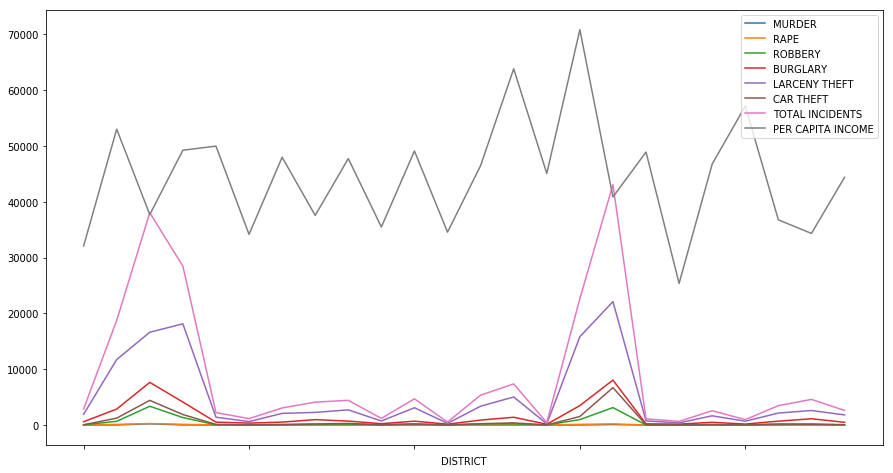

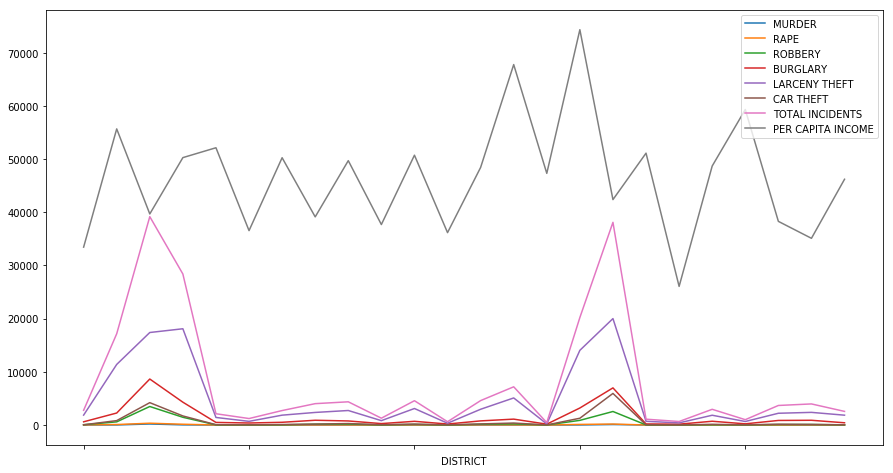

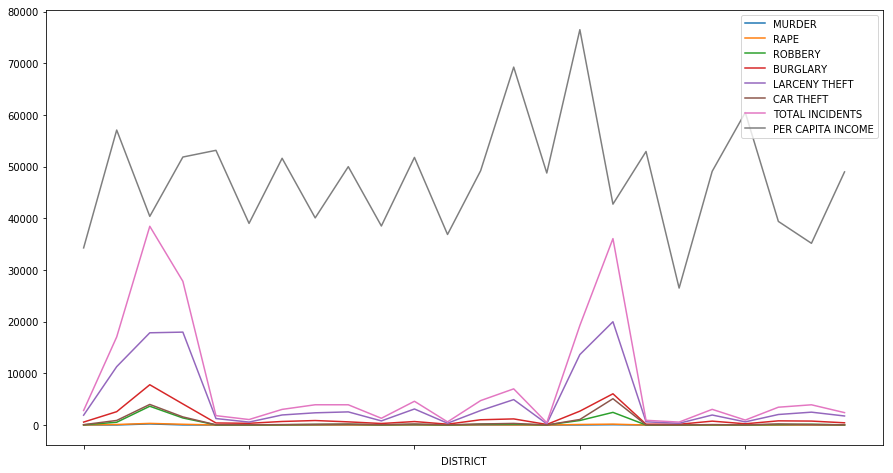

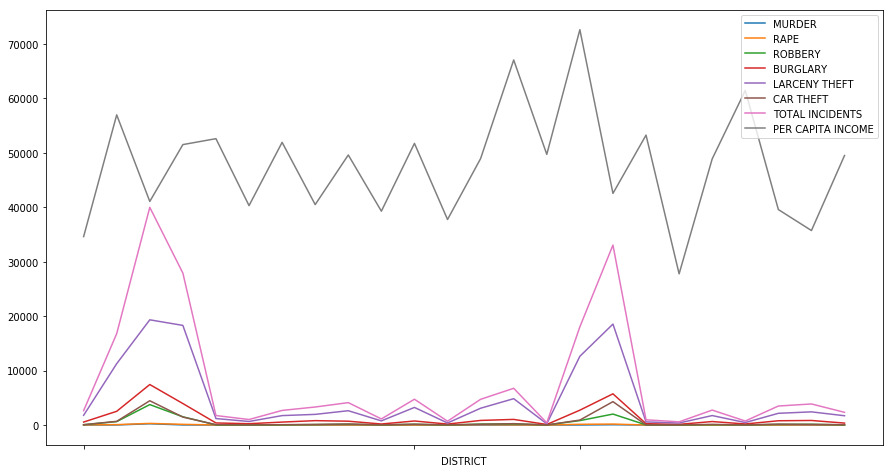

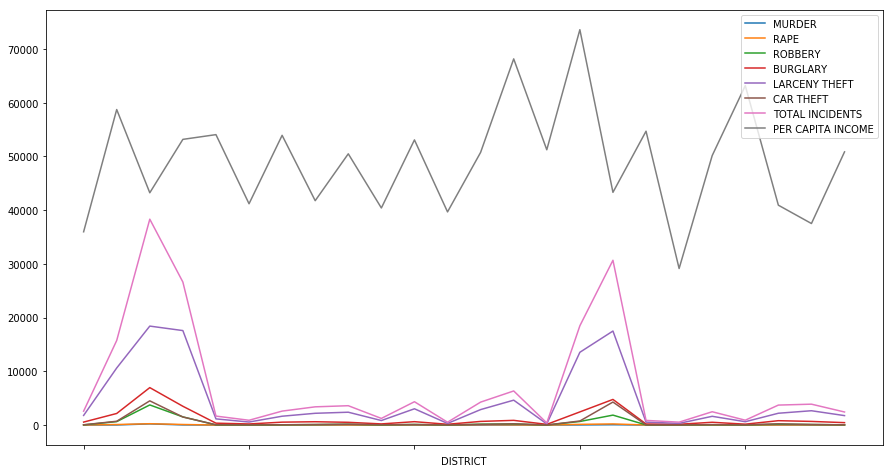

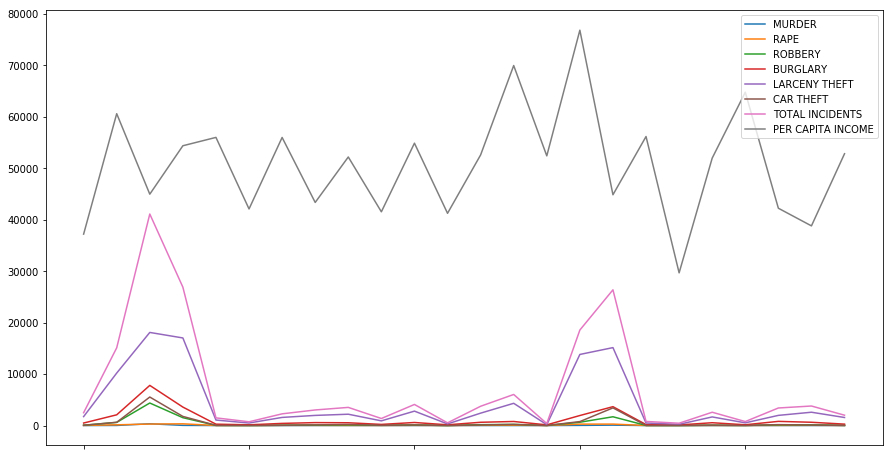

In [22]:
plt.figure(); df_2010.plot(figsize=(15,8));
plt.figure(); df_2011.plot(figsize=(15,8));
plt.figure(); df_2012.plot(figsize=(15,8));
plt.figure(); df_2013.plot(figsize=(15,8));
plt.figure(); df_2014.plot(figsize=(15,8));
plt.figure(); df_2015.plot(figsize=(15,8));

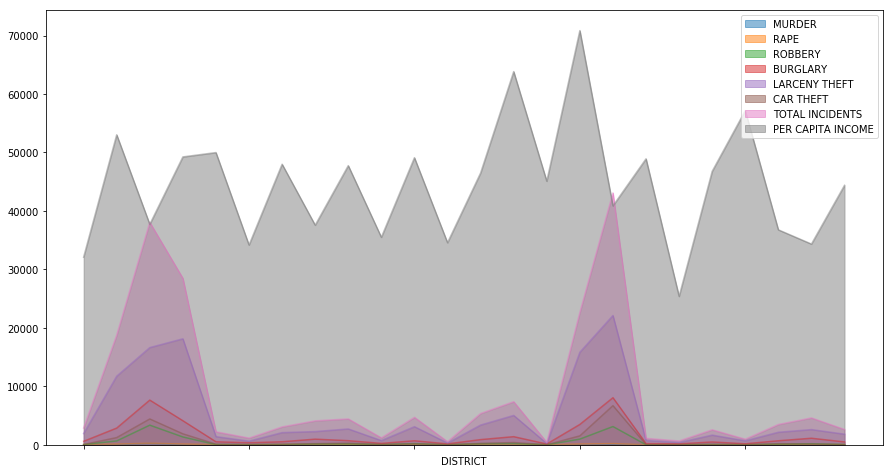

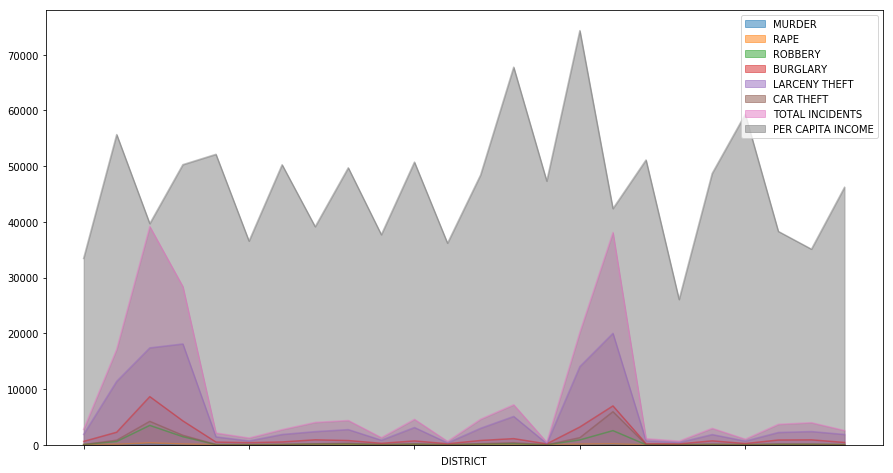

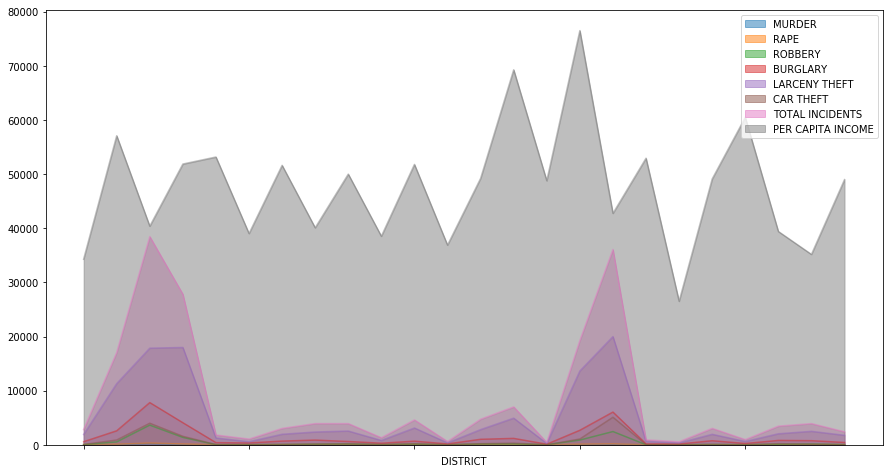

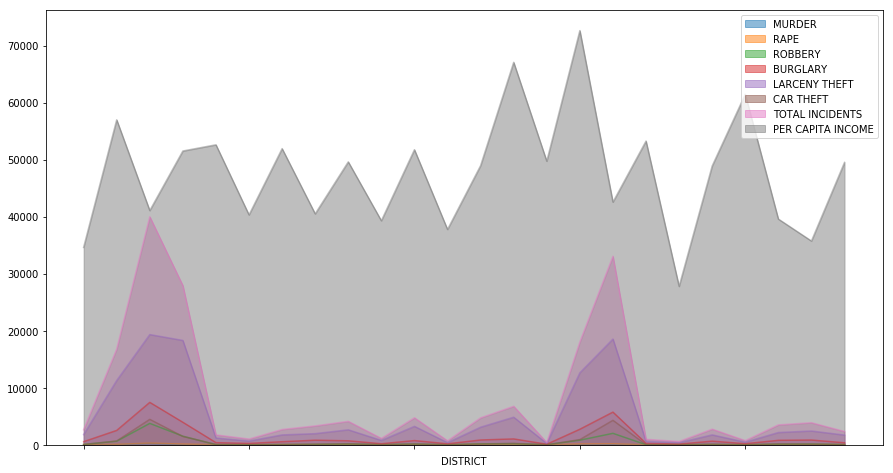

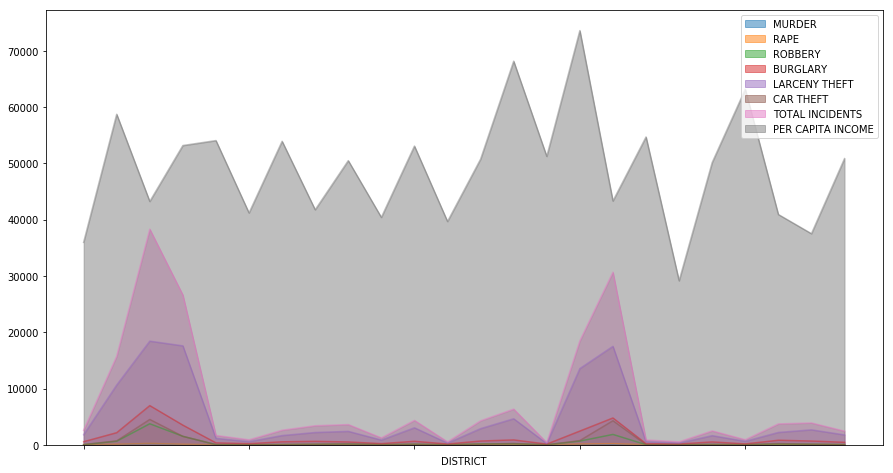

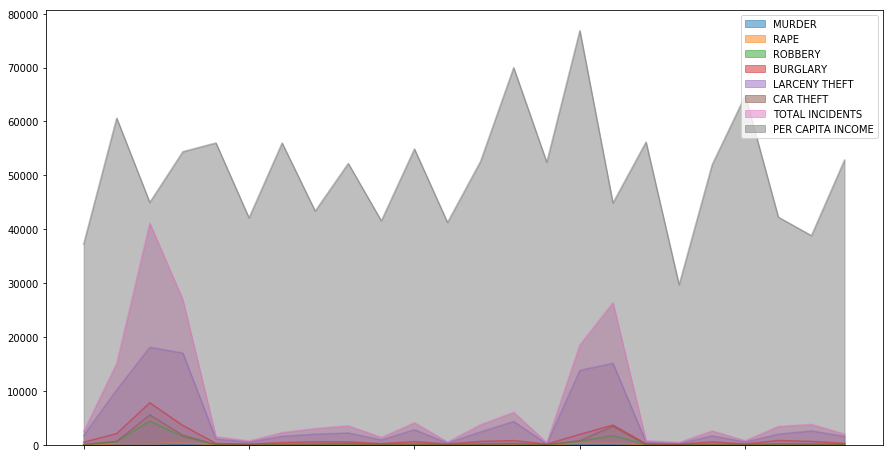

In [23]:
df_2010.plot.area(figsize=(15,8), stacked=False)
df_2011.plot.area(figsize=(15,8), stacked=False)
df_2012.plot.area(figsize=(15,8), stacked=False)
df_2013.plot.area(figsize=(15,8), stacked=False)
df_2014.plot.area(figsize=(15,8), stacked=False)
df_2015.plot.area(figsize=(15,8), stacked=False)